# 3/ Problem solutions

In [1]:
from sympy import *
init_printing()

## P3.1

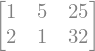

In [2]:
AUG = Matrix([
    [1, 5,   25],
    [2, 1,   32]])
AUG

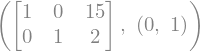

In [3]:
AUG.rref()

## P3.2

In the above solution we showed how to build `AUG` matrix directly.
This time, we'll build `AUG` by row-joining (`row_join`) a matrix of coefficients and a vector of constants.

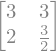

In [4]:
A = Matrix([
    [3,       3],
    [2,  S(3)/2]])
A

In [5]:
b = Matrix([6,5])  # b is a column vector
b

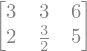

In [6]:
# row-join A and b to obtain the augmented matrix
AUG = A.row_join(b)
AUG

### a) Alice

Let's obtain the matrix `AUGA` which is the result after Alice's row operation.

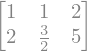

In [7]:
AUGA = AUG.copy()  # make a copy of AUG
AUGA[0,:] = AUGA[0,:]/3
AUGA

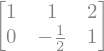

In [8]:
AUGA[1,:] = AUGA[1,:] - 2*AUGA[0,:]
AUGA

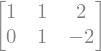

In [9]:
AUGA[1,:] = -2*AUGA[1,:]
AUGA

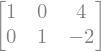

In [10]:
AUGA[0,:] = AUGA[0,:] - AUGA[1,:]
AUGA

### b) Bob

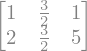

In [11]:
AUGB = AUG.copy()
AUGB[0,:] = AUGB[0,:] - AUGB[1,:]
AUGB

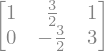

In [12]:
AUGB[1,:] = AUGB[1,:] - 2*AUGB[0,:]
AUGB

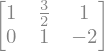

In [13]:
AUGB[1,:] = -1*S(2)/3*AUGB[1,:]
AUGB

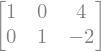

In [14]:
AUGB[0,:] = AUGB[0,:] - S(3)/2*AUGB[1,:]
AUGB

### c) Charlotte

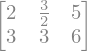

In [15]:
AUGC = AUG.copy()
AUGC[0,:], AUGC[1,:] = AUGC[1,:], AUGC[0,:]
AUGC

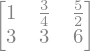

In [16]:
AUGC[0,:] = AUGC[0,:]/2
AUGC

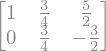

In [17]:
AUGC[1,:] = AUGC[1,:] - 3*AUGC[0,:]
AUGC

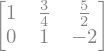

In [18]:
AUGC[1,:] = S(4)/3*AUGC[1,:]
AUGC

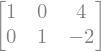

In [19]:
AUGC[0,:] = AUGC[0,:] - S(3)/4*AUGC[1,:]
AUGC

## P3.3

In [20]:
# define agmented matrices for three systems of eqns. with unique sol'ns
AUGA = Matrix([
        [ -1, -2, -2],
        [  3, 3, 0]])

AUGB = Matrix([
        [ 1, -1, -2,  1],
        [-2,  3,  3, -1],
        [-1,  0,  1,  2]])

AUGC = Matrix([
        [ 2, -2,  3, 2],
        [ 1, -2, -1, 0],
        [-2,  2,  2, 1]])

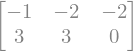

In [21]:
AUGA

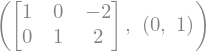

In [22]:
AUGA.rref()

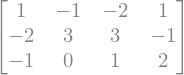

In [23]:
AUGB

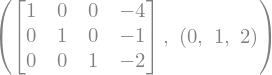

In [24]:
AUGB.rref()

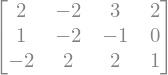

In [25]:
AUGC

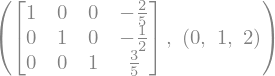

In [26]:
AUGC.rref()

## P3.4

These three systems of equations have infinitely many solutions.

### P3.4 a)

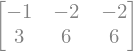

In [27]:
AUGA = Matrix([
    [ -1, -2,  -2],
    [  3,  6,   6]])
AUGA

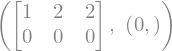

In [28]:
AUGA.rref()

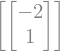

In [29]:
AUGA[0:2,0:2].nullspace()

In [30]:
# the solutions to the sytem of equations represented by AUGA
# is of the form    point + nullspace
point = AUGA.rref()[0][:,2]
nullspace = AUGA[0:2,0:2].nullspace()

In [31]:
# the point is also called he particular solution
point

True


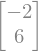

In [32]:
# if the augmented matrix AUGA is [A|b], then the point satisfies A*point = b
print( AUGA[0:2,0:2]*point == AUGA[:,2] )
AUGA[0:2,0:2]*point

#### Finding the null space

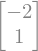

In [33]:
# the nullspace of A is one dimensional and spanned by
n = nullspace[0]
n
# every vector n in the nullspace of A satisfies  A*n=0

In [34]:
# so solution to A*x=b is any (point+s*n) where s is any real number
# since  A*(point+s*n) = A*point + sA*n = A*point + 0 = b.
# Let's verify claim for values of s in the range -5,-4,-3,-2,-1,0,1,2,3,4,5
for s in range(-5,6):
    print( AUGA[0:2,0:2]*(point + s*n), 
           AUGA[0:2,0:2]*(point + s*n) == AUGA[:,2] )

Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True


### P3.4 b)

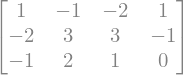

In [35]:
AUGB = Matrix([
        [ 1, -1, -2,   1],
        [-2,  3,  3,  -1],
        [-1,  2,  1,   0]])
AUGB

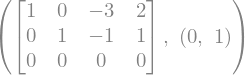

In [36]:
AUGB.rref()

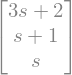

In [37]:
point_B = AUGB.rref()[0][:,3]
nullspace_B = AUGB[0:3,0:3].nullspace()[0]
s = symbols('s')
point_B + s*nullspace_B

### P3.4 c)

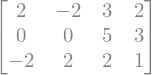

In [38]:
AUGC = Matrix([
        [ 2, -2, 3,  2],
        [ 0,  0, 5,  3],
        [-2,  2, 2,  1]])
AUGC

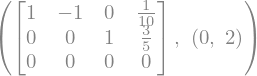

In [39]:
AUGC.rref()

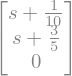

In [40]:
point_C = AUGC.rref()[0][:,3]
nullspace_C = AUGC[0:3,0:3].nullspace()[0]
s = symbols('s')
point_C + s*nullspace_C